In [149]:
import os
import pandas as pd
import tweepy as tw
import time
from textblob import TextBlob
    
consumer_key= 'JK6KzgIcFx4x73RLI3ItGj1TN'
consumer_secret= 'hyjFf2Kg6tbWWXB47aHwQWgdnP3DQFOk7jdSPxe7AkzJCzqXfa'
access_token= '31467843-K2GeCa6pBGaOUvPQdQRnOOgxrGSikeDKj1C3tImr9'
access_token_secret= 'VCrT3mpZrYhdA3VDXM9vVG1WSVTWHE7c0DSyypLMAnRhm'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Define the search term and the date_since date as variables
#Justin - 2020-08-31 - 2020-09-02
#Luke -  2020-09-03 - 2020-09-05

try:
    search_words = ('Biden OR Trump')
    date_since = "2020-09-07"  
    date_until = "2020-09-08"

    # Collect tweets
    tweets = tw.Cursor(api.search,
                  q=search_words,
                  lang="en",
                  since=date_since,
                  until=date_until,
                  include_rts=False).items(2600)

    # Iterate and print tweets
    users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.text, tweet.created_at] for tweet in tweets]
    tweet_text = pd.DataFrame(data=users_locs,
                              columns=['user', 'location', 'tweets', 'date'])
    tweet_text.to_csv('tweetsSept4B2600.csv')

except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

tweet_text



,user,location,tweets,date


In [137]:
import os
import glob
import pandas as pd
os.chdir("/Users/Luke/PythonProjects/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv("tweets.csv", index=False, encoding='utf-8-sig')


In [236]:
import os
import pandas as pd
from textblob import TextBlob

tweets = pd.read_csv('tweets.csv')

#drop unnamed coluns
drop_cols = [col for col in tweets.columns if 'Unnamed' in col]
tweets.drop(columns=drop_cols, inplace=True)

tweets['tweets'] = tweets['tweets'].str.lower()

tweets['polarity'] = tweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
tweets['subjectivity'] = tweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

tweets['polarity'] = tweets['polarity'].astype(float)
tweets['subjectivity'] = tweets['subjectivity'].astype(float)


tweets.loc[tweets['tweets'].str.contains('trump'), 'Candidate'] = 'Trump (Republican)'
tweets.loc[tweets['tweets'].str.contains('biden'), 'Candidate'] = 'Biden (Democrat)'


tweets.loc[(tweets["polarity"] > 0) , "Sentiment"] = 'positive'
tweets.loc[(tweets["polarity"] < 0), "Sentiment"] = 'negative'
tweets.loc[(tweets["polarity"] == 0), "Sentiment"] = 'neutral'

tweets = tweets[tweets['Candidate'].notna()]

tweets['date'] = pd.to_datetime(tweets['date']).dt.strftime('%m/%d/%Y')

tweets.to_csv('sentiment.csv')
tweets


,user,location,tweets,date,polarity,subjectivity,Candidate,Sentiment
0,55hopesanchor,"Florida, USA",rt @symonedsanders: joe biden went to kenosha ...,09/03/2020,0.000000,0.000000,Biden (Democrat),neutral
1,dwade575,NaN,rt @atrupar: the trump superspreader tour 2020...,09/03/2020,0.000000,0.000000,Trump (Republican),neutral
2,barbarabgood1,NaN,@travisallen02 everything trump touches dies.,09/03/2020,0.000000,0.000000,Trump (Republican),neutral
3,Pup4rDT,"Los Angeles, CA",rt @gatewaypundit: secret service inadvertentl...,09/03/2020,0.050000,0.766667,Biden (Democrat),positive
5,jlanderson1977,"Midland, TX",rt @janicetxblessed: guess there will be viole...,09/03/2020,0.316667,0.233333,Biden (Democrat),positive
...,...,...,...,...,...,...,...,...
10395,Gareth_PanChem,South Australia,rt @politics_pr: opinion: why the coronavirus ...,09/05/2020,-0.050000,0.050000,Trump (Republican),negative
10396,barryv223,NaN,rt @cernovich: trump came to dover after my wi...,09/05/2020,0.000000,0.450000,Trump (Republican),neutral
10397,Rstrickland5,"Fort Worth, TX",rt @nikkihaley: biden should take this down. a...,09/05/2020,0.225926,0.629630,Biden (Democrat),positive
10398,MariaNicoleDiN1,NaN,rt @darinp2: @charliekirk11 if charlie kirk kn...,09/05/2020,0.000000,0.000000,Trump (Republican),neutral


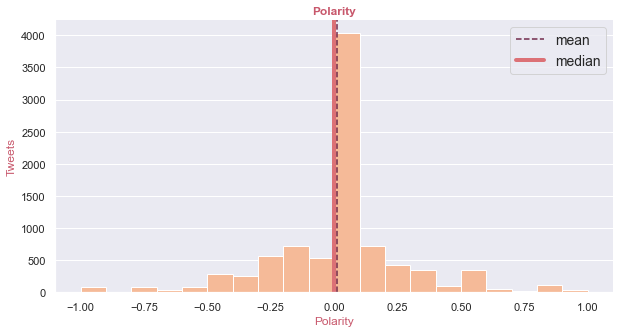

In [237]:
import matplotlib.pyplot as plt

#Check Polarity Sample

ax = tweets['polarity'].hist(bins=20, edgecolor='w', color='#f5ba98',  figsize=(10, 5))

# Here you can override the colors of set using rcParams by simply passing a value for the arguments.
ax.set_title('Polarity', color='#c8586c', fontweight='bold')
ax.set_xlabel('Polarity', color='#c8586c')
ax.set_ylabel('Tweets', color='#c8586c');

# To remove the spines of the chart manually, you can choose to set the visibility to False
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

ax.axvline(x=tweets['polarity'].mean(), color='#70284a', linestyle='--', label='mean')
ax.axvline(x=tweets['polarity'].median(), color='#dc7176', linewidth=4, label='median')
ax.legend(fontsize=14);



In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#sentiment = pd.pivot_table(tweets,index=['date'],columns = 'Candidate', aggfunc={'polarity':np.mean})


nonzero = tweets.query("polarity!=0")
sentiment = nonzero.groupby(['date','Candidate'])['polarity'].aggregate('mean').unstack()
sentiment



Candidate,Biden (Democrat),Trump (Republican)
date,,
09/03/2020,0.046164,-0.016143
09/04/2020,-0.011229,0.005919
09/05/2020,0.130996,0.030688
09/06/2020,0.079013,0.014816


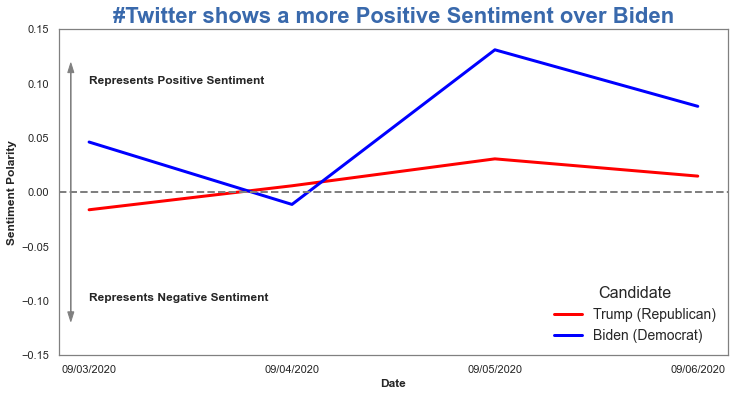

In [436]:
%matplotlib inline
import matplotlib.pyplot as plt

#if pivot chart
# axis_1 = tweets.pivot_table('polarity', index='date', columns='Candidate', aggfunc='mean').plot(figsize=(12, 6),
#                                                                                                 linewidth = 3)

fig = plt.figure(figsize=(12, 6))

axis_1 = sentiment['Trump (Republican)'].plot(kind='line',color='red',label="Trump (Republican)", linewidth = 3)
axis_1 = sentiment['Biden (Democrat)'].plot(kind='line',color='blue',label="Biden (Democrat)", linewidth = 3)

plt.ylabel('Sentiment Polarity',fontweight='bold')
plt.xlabel('Date',fontweight='bold')
plt.title('#Twitter shows a more Positive Sentiment over Biden', size = 22, color='#3969AC', fontweight='bold')
axis_1.legend(frameon=False, loc='lower right', fontsize = 14, title = "Candidate", title_fontsize = 16)
axis_1.set_facecolor('xkcd:white')
axis_1.spines['bottom'].set_color('0.5')
axis_1.spines['top'].set_color('0.5')
axis_1.spines['right'].set_color('0.5')
axis_1.spines['left'].set_color('0.5')
axis_1.set_ylim(-0.15,0.15)

axis_1.axhline(y=0, color='gray',linestyle='--', linewidth = 2)
plt.text(0, .1,'Represents Positive Sentiment', fontweight='bold', fontsize = 12)
plt.text(0, -.1,'Represents Negative Sentiment', fontweight='bold', fontsize = 12)
# P.arrow( x, y, dx, dy, **kwargs )
plt.arrow(-.09, -0.02, 0.0, -0.09, fc="gray", ec="gray",head_width=0.03, head_length=0.009)
plt.arrow(-.09, -0.02, 0.0, 0.13, fc="gray", ec="gray",head_width=0.03, head_length=0.009);



